In [33]:
import pandas as pd
from matplotlib import pyplot as plt

In [34]:
countriesData = pd.read_csv("Data/Countries.csv")
demographicData = pd.read_csv("Data/WPP2022-Demographic-Indicators-Medium-csv.csv")

In [35]:
demographicData.head()

,LocID,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,108,BDI,BI,108,4,Country/Area,910,Burundi,2,Medium,...,641.8547,595.1510,290.7911,308.1964,274.8946,423.9146,452.6005,397.8913,-13.343,-5.893
1,108,BDI,BI,108,4,Country/Area,910,Burundi,2,Medium,...,640.8312,589.4012,288.3539,307.9939,270.3494,420.8717,452.3522,392.1761,-13.217,-5.721
2,108,BDI,BI,108,4,Country/Area,910,Burundi,2,Medium,...,638.2902,587.9175,288.0273,307.0741,270.5827,420.4448,451.2164,392.4644,-13.715,-5.815
3,108,BDI,BI,108,4,Country/Area,910,Burundi,2,Medium,...,634.7139,584.4393,286.2351,305.3711,268.7026,418.1934,449.0344,390.1690,-14.962,-6.216
4,108,BDI,BI,108,4,Country/Area,910,Burundi,2,Medium,...,631.5888,580.1806,284.1157,303.6124,266.2347,415.5703,446.9088,387.0907,-14.599,-5.948


In [36]:
countriesData.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [37]:
requiredFields = countriesData[["name", "alpha-3", "region", "sub-region"]]
requiredFields = requiredFields.rename(columns={"alpha-3":"ISO3_code"})

In [38]:
requiredFields

,name,ISO3_code,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia
...,...,...,...,...
244,Wallis and Futuna,WLF,Oceania,Polynesia
245,Western Sahara,ESH,Africa,Northern Africa
246,Yemen,YEM,Asia,Western Asia
247,Zambia,ZMB,Africa,Sub-Saharan Africa


In [39]:
combined_data = pd.merge(demographicData, requiredFields, on='ISO3_code')

In [40]:
birth_death_data = combined_data[["name", "region", "sub-region", "Time", "Births", "Deaths",  "DeathsMale", "DeathsFemale"]].rename(columns={"name":"Country", "region":"Region","sub-region":"SubRegion", "Time":"Year"})
birth_death_data

,Country,Region,SubRegion,Year,Births,Deaths,DeathsMale,DeathsFemale
0,Burundi,Africa,Sub-Saharan Africa,1950,116.224,53.310,27.069,26.241
1,Burundi,Africa,Sub-Saharan Africa,1951,117.067,55.161,28.189,26.972
2,Burundi,Africa,Sub-Saharan Africa,1952,117.770,56.169,28.679,27.490
3,Burundi,Africa,Sub-Saharan Africa,1953,119.013,56.811,28.988,27.823
4,Burundi,Africa,Sub-Saharan Africa,1954,119.972,57.299,29.270,28.029
...,...,...,...,...,...,...,...,...
17459,Wallis and Futuna,Oceania,Polynesia,2019,0.144,0.072,0.037,0.034
17460,Wallis and Futuna,Oceania,Polynesia,2020,0.140,0.080,0.042,0.038
17461,Wallis and Futuna,Oceania,Polynesia,2021,0.138,0.086,0.046,0.040
17462,Wallis and Futuna,Oceania,Polynesia,2022,0.135,0.077,0.040,0.037


In [41]:
df_by_time = {k: v for (k, v) in birth_death_data.groupby('Year')[["Births","Deaths",  "DeathsMale", "DeathsFemale"]]}
data = []
for k, v in df_by_time.items():
    data.append([k, v["Births"].sum(), v["Deaths"].sum(), v["DeathsMale"].sum(), v["DeathsFemale"].sum()])
world_birth_death_data = pd.DataFrame(data, columns=["Year", "Births", "Deaths", "DeathsMale", "DeathsFemale"])
world_birth_death_data["NormalizedBirths"] = world_birth_death_data["Births"] / world_birth_death_data["Births"].iloc[0]
world_birth_death_data["NormalizedDeaths"] = world_birth_death_data["Deaths"] / world_birth_death_data["Deaths"].iloc[0]
world_birth_death_data

,Year,Births,Deaths,DeathsMale,DeathsFemale,NormalizedBirths,NormalizedDeaths
0,1950,92049.049,48778.107,25779.180,22998.929,1.000000,1.000000
1,1951,92801.786,48504.270,25499.931,23004.338,1.008178,0.994386
2,1952,97570.600,47636.416,24930.048,22706.357,1.059985,0.976594
3,1953,97518.857,47488.826,24800.991,22687.830,1.059423,0.973568
4,1954,100310.567,46992.560,24534.629,22457.931,1.089751,0.963394
...,...,...,...,...,...,...,...
69,2019,137964.762,57929.531,31237.386,26692.148,1.498818,1.187613
70,2020,135113.834,63162.064,34309.880,28852.182,1.467846,1.294886
71,2021,133956.085,69236.514,37518.391,31718.129,1.455269,1.419418
72,2022,133972.197,67087.556,36122.838,30964.719,1.455444,1.375362


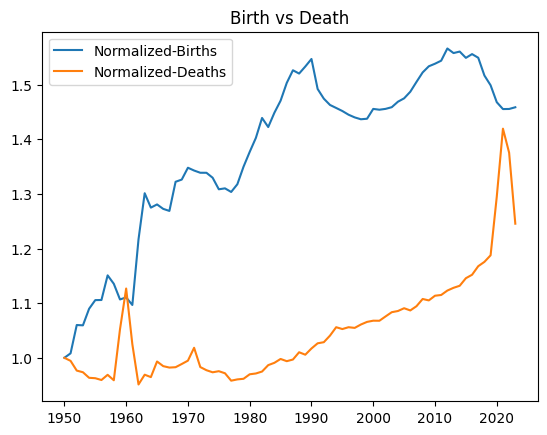

In [53]:
plt.figure()
plt.plot(world_birth_death_data["Year"], world_birth_death_data["NormalizedBirths"])
plt.plot(world_birth_death_data["Year"], world_birth_death_data["NormalizedDeaths"])
plt.title("Birth vs Death")
plt.legend(["Normalized-Births", "Normalized-Deaths"])
plt.show()

In [43]:
world_birth_death_data.to_csv("Data/World_Birth_Death.csv", encoding='utf-8', index=False)

In [45]:
df_by_region = {k: v for (k, v) in birth_death_data.groupby(['Region','Year'])[["Deaths", "DeathsMale", "DeathsFemale"]]}
data = []
for k, v in df_by_region.items():
    data.append([k[0], k[1], v["Deaths"].sum(), v["DeathsMale"].sum(), v["DeathsFemale"].sum()])
region_birth_death_data = pd.DataFrame(data, columns=["Region", "Year", "Deaths", "DeathsMale", "DeathsFemale"])
# region_birth_death_data = region_birth_death_data [(region_birth_death_data["Year"] > 1955) & (region_birth_death_data["Year"] < 1962)]
region_birth_death_data 

,Region,Year,Deaths,DeathsMale,DeathsFemale
0,Africa,1950,6063.050,3152.132,2910.918
1,Africa,1951,6132.528,3187.395,2945.130
2,Africa,1952,6154.913,3199.514,2955.396
3,Africa,1953,6188.069,3216.663,2971.401
4,Africa,1954,6233.529,3252.413,2981.114
...,...,...,...,...,...
365,Oceania,2019,281.050,151.823,129.229
366,Oceania,2020,278.509,148.187,130.323
367,Oceania,2021,289.596,154.224,135.368
368,Oceania,2022,299.196,162.170,137.022


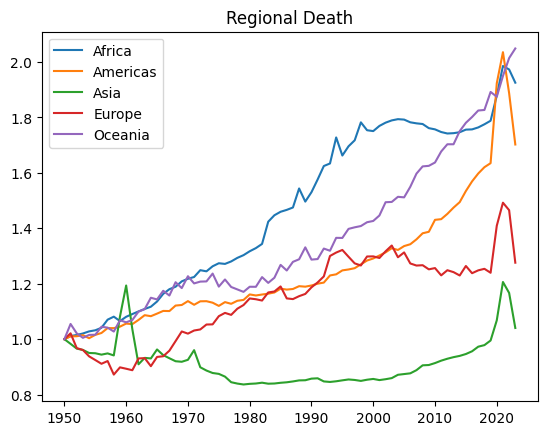

,Region,Year,Deaths,DeathsMale,DeathsFemale,NormalizedDeaths
0,Africa,1950,6063.05,3152.132,2910.918,1.0
1,Africa,1951,6132.528,3187.395,2945.13,1.011459
2,Africa,1952,6154.913,3199.514,2955.396,1.015151
3,Africa,1953,6188.069,3216.663,2971.401,1.02062
4,Africa,1954,6233.529,3252.413,2981.114,1.028118
...,...,...,...,...,...,...
365,Oceania,2019,281.05,151.823,129.229,1.891905
366,Oceania,2020,278.509,148.187,130.323,1.8748
367,Oceania,2021,289.596,154.224,135.368,1.949433
368,Oceania,2022,299.196,162.17,137.022,2.014055


In [46]:
region_birth_death_data_normalized = pd.DataFrame([], columns=["Region", "Year", "Deaths", "DeathsMale", "DeathsFemale","NormalizedDeaths"])
plt.figure()
plt.title("Regional Death")
legends = []
for key, value in region_birth_death_data.groupby("Region"):
    legends.append(key)
    value["NormalizedDeaths"] = value["Deaths"] / value["Deaths"].iloc[0]
    region_birth_death_data_normalized = pd.concat([region_birth_death_data_normalized, value], axis=0, join="inner")
    plt.plot(value["Year"], value["NormalizedDeaths"])
plt.legend(legends)
plt.show()
region_birth_death_data_normalized

In [47]:
region_birth_death_data_normalized.to_csv("Data/Region_Death.csv", encoding='utf-8', index=False)

In [48]:
country_birth_death_data_normalized = pd.DataFrame([], columns=["Country", "Region", "Year", "Deaths", "DeathsMale", "DeathsFemale","NormalizedDeaths"])

for (k, v) in birth_death_data.groupby(["Country"])[["Country", "Year", "Region","Deaths", "DeathsMale", "DeathsFemale"]]:
    v["NormalizedDeaths"] = v["Deaths"] / v["Deaths"].iloc[0]
    country_birth_death_data_normalized = pd.concat([country_birth_death_data_normalized, v], axis=0, join="inner")
    
country_birth_death_data_normalized

,Country,Region,Year,Deaths,DeathsMale,DeathsFemale,NormalizedDeaths
5254,Afghanistan,Asia,1950,283.668,152.514,131.154,1.0
5255,Afghanistan,Asia,1951,282.577,152.188,130.39,0.996154
5256,Afghanistan,Asia,1952,280.803,151.241,129.562,0.9899
5257,Afghanistan,Asia,1953,279.684,150.571,129.113,0.985955
5258,Afghanistan,Asia,1954,280.476,150.791,129.685,0.988747
...,...,...,...,...,...,...,...
1475,Zimbabwe,Africa,2019,123.744,63.152,60.592,2.668795
1476,Zimbabwe,Africa,2020,127.551,66.267,61.284,2.7509
1477,Zimbabwe,Africa,2021,144.973,75.309,69.665,3.126642
1478,Zimbabwe,Africa,2022,146.0,75.369,70.631,3.148791


In [49]:
country_birth_death_data_normalized.to_csv("Data/Country_Death.csv", encoding='utf-8', index=False)

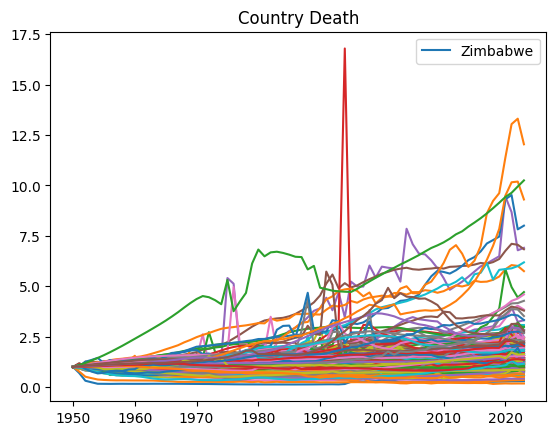

In [50]:
plt.figure()
for (key, value) in country_birth_death_data_normalized.groupby(["Country"])[["Year", "Region","Deaths", "DeathsMale", "DeathsFemale", "NormalizedDeaths"]]:
    plt.title("Country Death")
    legends = []
    legends.append(key)
    plt.plot(value["Year"], value["NormalizedDeaths"])
    plt.legend(legends)
plt.show() 

In [51]:
# df_names = {k: v for (k, v) in combined_data.groupby('name')}

In [19]:
# a = combined_data[(combined_data["Time"] > 1957) & (combined_data["Time"] < 1962)]
# df_names = {k: v for (k, v) in a.groupby('name')}

In [20]:
# for k in df_names.keys():
#     pop = df_names[k]["Deaths"]
#     year = df_names[k]["Time"]
#     plt.figure()
#     plt.plot(year, pop)
#     plt.title(k)
#     plt.show()

In [21]:
# a = combined_data[(combined_data["Time"] > 2017)]
# print(a)
# df_time = {k: v for (k, v) in a.groupby('Time')["Deaths"]}
# year = []
# pop = []
# for k, v in df_time.items():
#     year.append(k)
#     pop.append(v.sum())

In [22]:
# plt.figure()
# plt.plot(year, pop)
# plt.title(k)
# # plt.xticks(year)
# plt.show()

In [23]:
# # a = combined_data[(combined_data["Time"] > 1955) & (combined_data["Time"] < 1965)]
# # print(a)
# df_time = {k: v for (k, v) in combined_data.groupby('Time')[["Deaths", "Births"]]}
# year = []
# pop = []
# pop_first = -1
# birth = []
# birth_first = -1
# for k, v in df_time.items():
#     year.append(k)
#     if pop_first == -1:
#         pop_first = v["Deaths"].sum()
#     pop.append(v["Deaths"].sum()/pop_first)
#     if birth_first == -1:
#         birth_first = v["Births"].sum()
#     birth.append(v["Births"].sum()/birth_first)

In [24]:
# plt.figure()
# plt.plot(year, pop)
# plt.plot(year, birth)
# plt.title(k)
# # plt.xticks(year)
# plt.show()